In [1]:
pip install yfinance

Note: you may need to restart the kernel to use updated packages.


In [1]:
import pandas as pd
#yfinance lib--> to download financial data from Yahoo Finance.
import yfinance as yf
import datetime
# timedelta represents a duration or difference between two dates or times.
from datetime import date, timedelta

In [2]:
today = date.today()
# These lines format the today date object as a string in the format 
# "YYYY-MM-DD" and assign it to the variable d1
d1 = today.strftime("%Y-%m-%d")

end_date = d1
# These lines calculate the date exactly one
# year ago from the current date by subtracting timedelta(days=365) from the today date object. 
d2 = date.today() - timedelta(days=365)
d2 = d2.strftime("%Y-%m-%d")
start_date = d2



In [3]:
# This line downloads historical stock data for the ticker symbol 'GOOG' (Google) using
# the yf.download() function from the yfinance library. The start date and end date for the data are 
# specified using the variables start_date and end_date, respectively. 
# The parameter progress=False is used to suppress the progress bar.
data = yf.download('GOOG', 
                      start=start_date, 
                      end=end_date,
#  When you use yf.download() function from the yfinance library to
#  download financial data, by default, it shows a progress bar indicating the progress of the download.
                      progress=True)

[*********************100%***********************]  1 of 1 completed


In [4]:
data["Date"] = data.index
data = data[["Date", "Open", "High", "Low", "Close", "Adj Close", "Volume"]]
# drop=True means that the current index will be removed and not included as a column in the DataFrame.
# Setting inplace=True means that the changes will be applied directly to the data 
# DataFrame, modifying it without creating a new DataFrame.
data.reset_index(drop=True, inplace=True)
print(data.tail())

          Date        Open        High         Low       Close   Adj Close  \
245 2023-05-22  123.510002  127.050003  123.449997  125.870003  125.870003   
246 2023-05-23  124.930000  125.419998  123.050003  123.290001  123.290001   
247 2023-05-24  121.879997  122.750000  120.750000  121.639999  121.639999   
248 2023-05-25  125.209999  125.980003  122.900002  124.349998  124.349998   
249 2023-05-26  124.065002  126.000000  123.290001  125.430000  125.430000   

       Volume  
245  29760200  
246  24477900  
247  23087900  
248  33812700  
249  25154700  


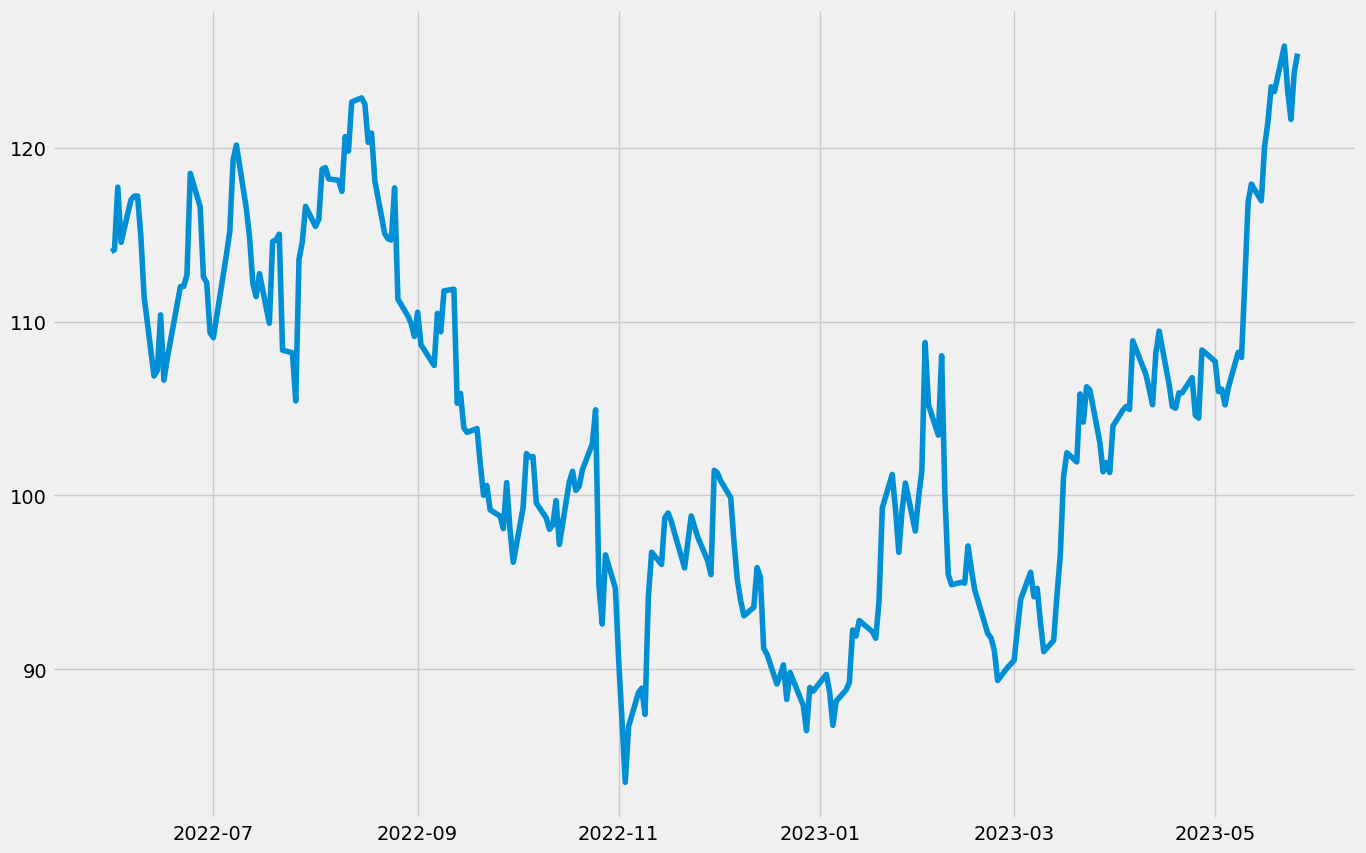

In [5]:
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
plt.figure(figsize=(15, 10))
plt.plot(data["Date"], data["Close"])

In [7]:
pip install statsmodels

In [9]:
from platform import python_version 

In [10]:
 python_version()

'3.11.1'

In [11]:
# pip install statsmodels==0.12.1
# !pip install statsmodels==0.10.2

In [12]:
# from statsmodels.tsa.seasonal import seasonal_decompose
# result = seasonal_decompose(data["Close"], model='multiplicative', period=30)
# fig = plt.figure()

# fig = result.plot()  
# fig.set_size_inches(15, 10)

In [6]:
import statsmodels as sm

print(sm.__version__)

0.14.0


In [23]:
pip install --upgrade statsmodels

Note: you may need to restart the kernel to use updated packages.


In [7]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [8]:
result = seasonal_decompose(data["Close"], model = 'multiplicative', period = 30)
# print(result)

<Figure size 640x480 with 0 Axes>

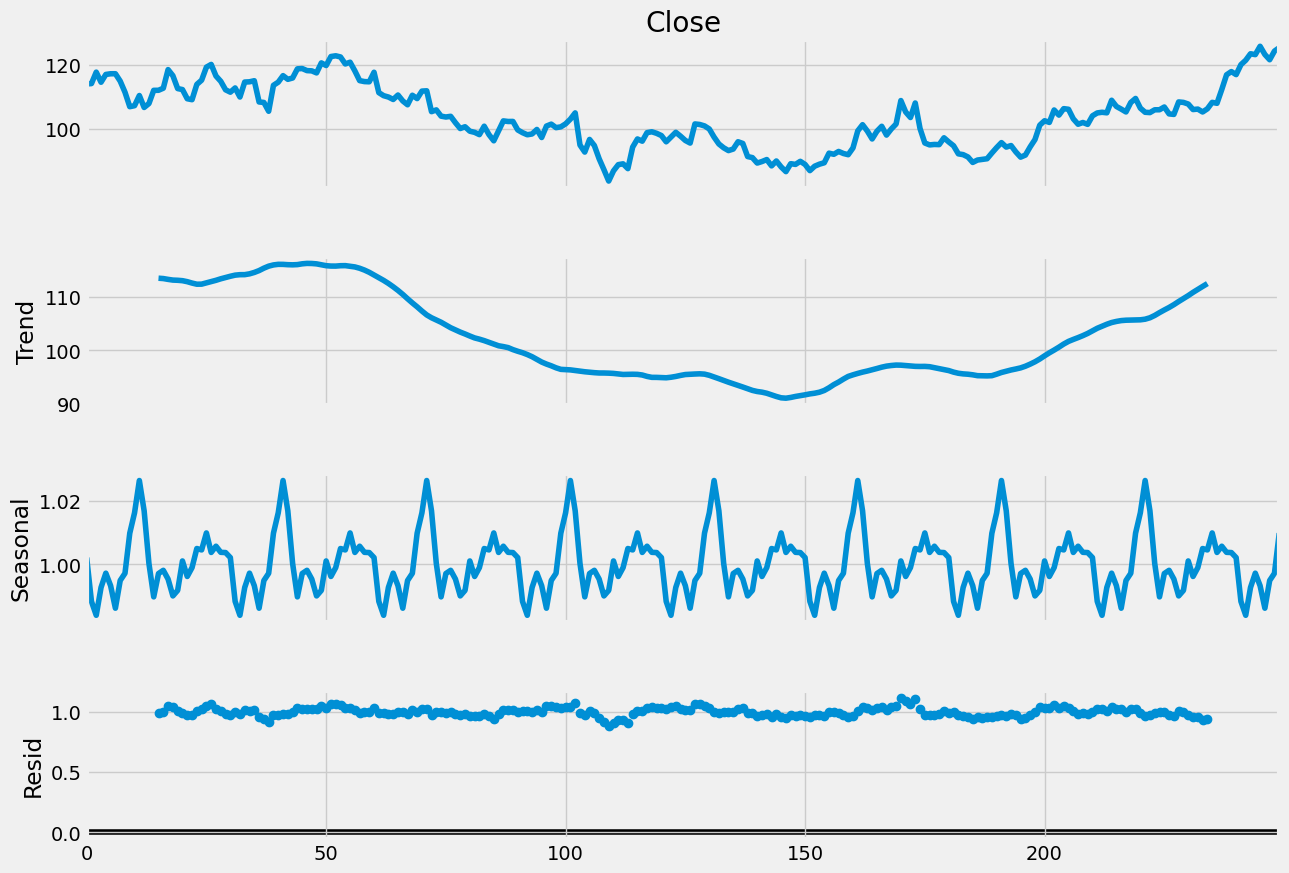

In [9]:
fig = plt.figure()  
fig = result.plot()  
fig.set_size_inches(15, 10)

<AxesSubplot: xlabel='Lag', ylabel='Autocorrelation'>

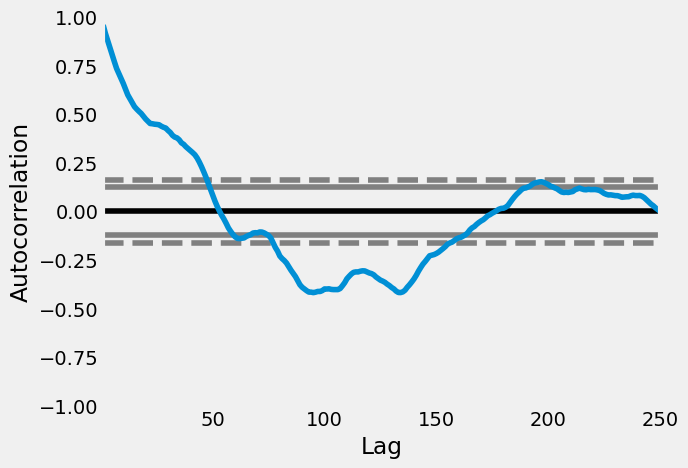

In [10]:
pd.plotting.autocorrelation_plot(data["Close"])

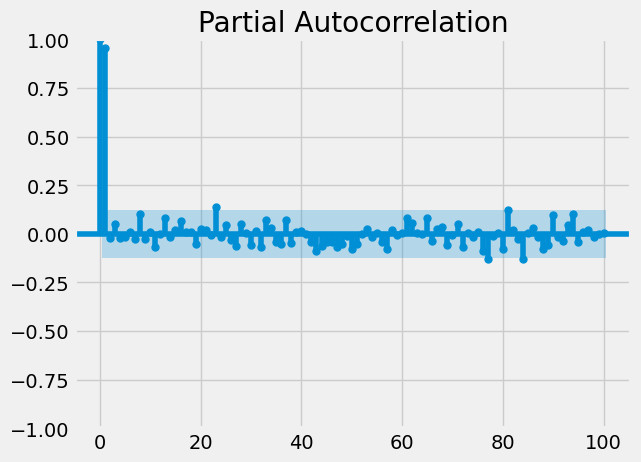

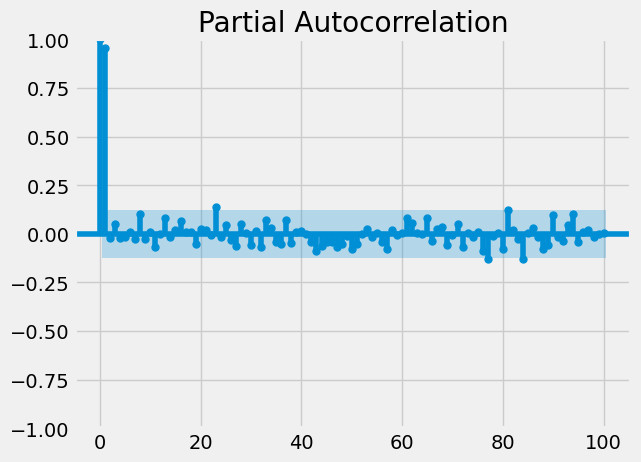

In [11]:
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(data["Close"], lags = 100)
# lags = 100-->  means that the function will consider correlations
# between the "Close" values of the time series and its past 100 observations.

In [23]:
p, d, q = 5, 1, 2
# from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.arima.model import ARIMA

In [25]:
model = ARIMA(data["Close"], order = (p, d, q))
# model = ARIMA(order=(p, d, q), disp=-1)

In [26]:
model_fit = model.fit()
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                  250
Model:                 ARIMA(5, 1, 2)   Log Likelihood                -579.114
Date:                Sun, 28 May 2023   AIC                           1174.229
Time:                        08:00:14   BIC                           1202.369
Sample:                             0   HQIC                          1185.556
                                - 250                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4794      5.686      0.084      0.933     -10.664      11.623
ar.L2         -0.0051      2.220     -0.002      0.998      -4.355       4.345
ar.L3          0.0459      0.527      0.087      0.9

In [28]:
predictions = model_fit.predict()
print(predictions)

0        0.000000
1      114.039009
2      114.138048
3      117.781999
4      114.228510
          ...    
245    122.833735
246    125.779677
247    122.827807
248    121.799920
249    124.301158
Name: predicted_mean, Length: 250, dtype: float64


The predicted values are wrong because the data is seasonal. ARIMA model will never perform well on seasonal time series data. So, here’s how to build a SARIMA model:

In [29]:
import statsmodels.api as sm
import warnings
# 12 represents the seasonal period, assuming monthly data.
model=sm.tsa.statespace.SARIMAX(data['Close'], order=(p, d, q), seasonal_order =(p, d, q, 12))

In [30]:
model=model.fit()
print(model.summary())

C:\Users\TAHIRA\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                     SARIMAX Results                                      
Dep. Variable:                              Close   No. Observations:                  250
Model:             SARIMAX(5, 1, 2)x(5, 1, 2, 12)   Log Likelihood                -563.979
Date:                            Sun, 28 May 2023   AIC                           1157.958
Time:                                    08:10:58   BIC                           1209.979
Sample:                                         0   HQIC                          1178.926
                                            - 250                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.4832      0.122    -12.137      0.000      -1.723      -1.244
ar.L2         -0.9726      0.168   

In [31]:
predictions = model.predict(len(data), len(data)+10)
print(predictions)

250    126.813683
251    127.411516
252    126.906698
253    126.668745
254    126.635424
255    126.147620
256    126.154073
257    126.415382
258    126.162443
259    126.181461
260    126.082923
Name: predicted_mean, dtype: float64


<AxesSubplot: >

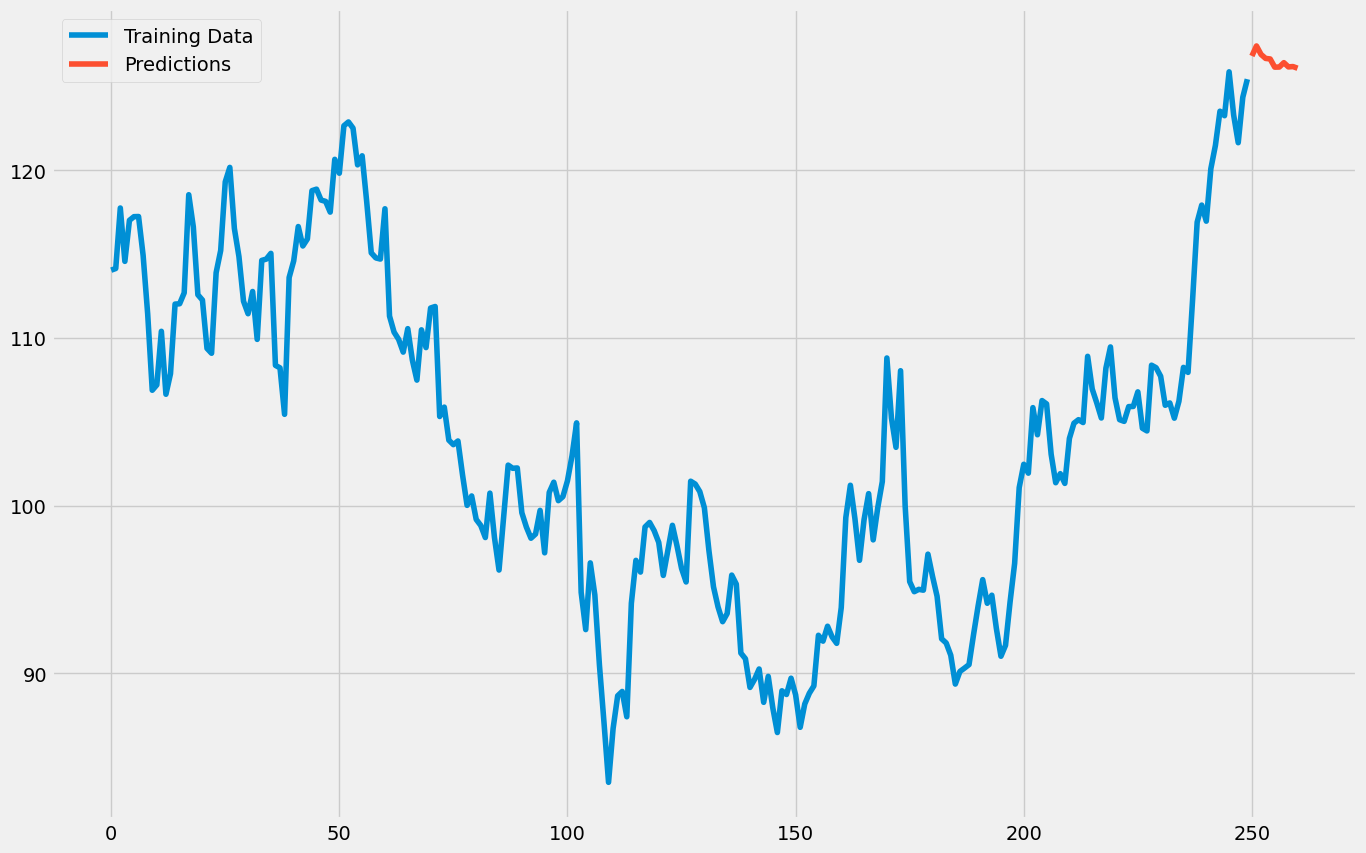

In [41]:
data["Close"].plot(legend=True, label="Training Data", figsize=(15, 10))
predictions.plot(legend=True, label="Predictions")

In [33]:
print("THE END!! *********ENJOY*********")

THE END!! *********ENJOY*********
